In [ ]:
import pandas as pd

# Replace 'janata.csv' with the exact name of your uploaded file
file_path = 'janata.csv'
data = pd.read_csv(file_path)
print(data.head())

            date trading_code  last_traded_price  high   low  opening_price  \
0  30-12-10 0:00    1JANATAMF               12.9  13.9  12.3           12.3   
1  29-12-10 0:00    1JANATAMF               11.8  12.3  11.2           11.7   
2  28-12-10 0:00    1JANATAMF               11.3  11.7  11.0           11.0   
3  27-12-10 0:00    1JANATAMF               11.3  11.5  11.0           11.5   
4  26-12-10 0:00    1JANATAMF               11.6  11.8  11.2           11.6   

   closing_price  yesterdays_closing_price  trade  value_mn   volume  
0           13.0                      12.0   4708  124.8680  9623500  
1           12.0                      11.3   1680   46.8126  3987000  
2           11.3                      11.2   1077   19.3689  1698500  
3           11.2                      11.4    932   13.9884  1249000  
4           11.4                      11.5   1671   31.8171  2746500  


Saving janata.csv to janata (2).csv


<ipython-input-5-16d19e2c09c3>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])
<ipython-input-5-16d19e2c09c3>:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_cleaned = time_series.replace(0, np.nan).fillna(method='ffill')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(da

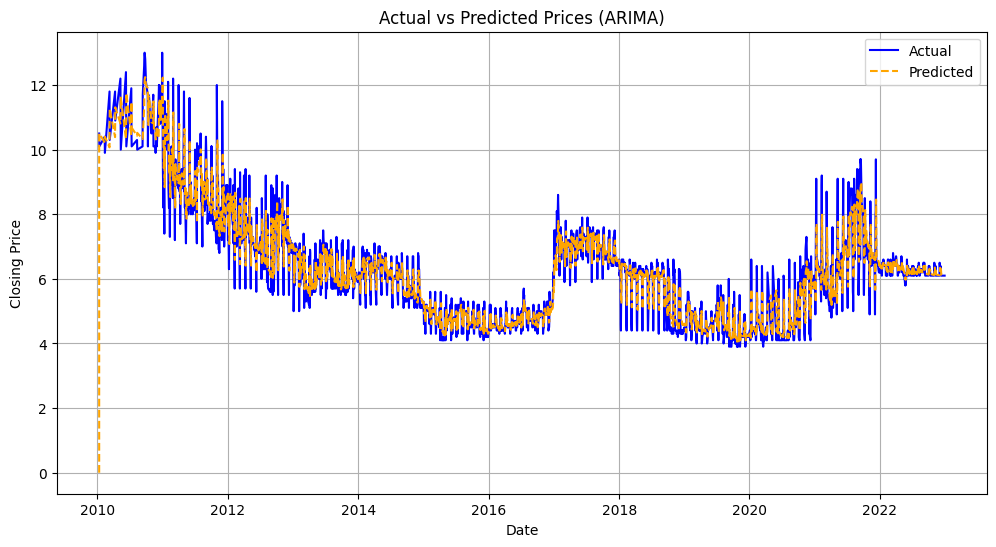

In [ ]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Upload the file or mount Google Drive (choose one method)
from google.colab import files
uploaded = files.upload()

# Replace 'janata.csv' with the uploaded file's name
file_path = 'janata.csv'
data = pd.read_csv(file_path)

# Convert the 'date' column to datetime and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Filter for the specific stock (e.g., trading_code = '1JANATAMF')
stock_data = data[data['trading_code'] == '1JANATAMF']

# Sort the data by date in ascending order
stock_data = stock_data.sort_index()

# Select the closing_price column for analysis
time_series = stock_data['closing_price']

# Replace zero values with NaN and fill missing values using forward fill
time_series_cleaned = time_series.replace(0, np.nan).fillna(method='ffill')

# Fit an ARIMA model (ARIMA(1,1,1))
model = ARIMA(time_series_cleaned, order=(1, 1, 1))
model_fit = model.fit()

# Generate predictions
predicted = model_fit.predict(start=0, end=len(time_series_cleaned) - 1, dynamic=False)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_series_cleaned, label='Actual', color='blue')
plt.plot(predicted, label='Predicted', color='orange', linestyle='--')
plt.title('Actual vs Predicted Prices (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()


<ipython-input-10-632fc74c5985>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series_resampled = time_series_cleaned.resample('M').mean()


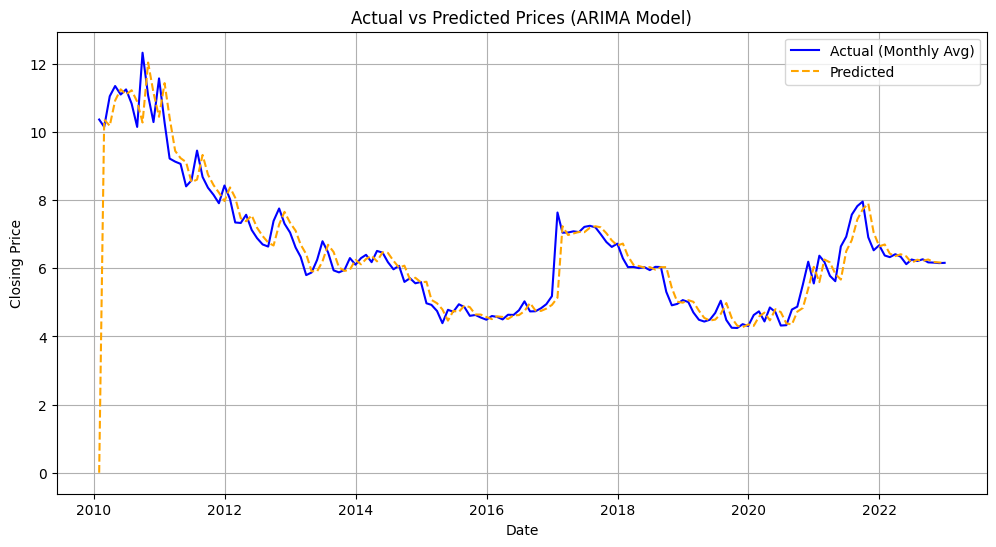

In [ ]:
# Resample data to monthly averages
time_series_resampled = time_series_cleaned.resample('M').mean()

# Fit ARIMA model on resampled data
model = ARIMA(time_series_resampled, order=(1, 1, 1))
model_fit = model.fit()

# Generate predictions
predicted = model_fit.predict(start=0, end=len(time_series_resampled) - 1, dynamic=False)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time_series_resampled, label='Actual (Monthly Avg)', color='blue')
plt.plot(predicted, label='Predicted', color='orange', linestyle='--')
plt.title('Actual vs Predicted Prices (ARIMA Model)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()


In [11]:
# Combine the actual and predicted values into a DataFrame
output_data = pd.DataFrame({
    'Date': time_series_resampled.index,
    'Actual (Monthly Avg)': time_series_resampled.values,
    'Predicted': predicted.values
})

# Save the output to a CSV file
output_file = 'output_data.csv'
output_data.to_csv(output_file, index=False)

# Provide a download link (for Google Colab)
from google.colab import files
files.download(output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>